# Vehicle Routing Problem Solution using Genetic Algorithm

This notebook implements a solution to the Vehicle Routing Problem (VRP) using a Genetic Algorithm approach. The problem involves:

- Multiple vehicles with different capacities and range constraints
- Multiple clients with specific demands
- A single depot where all vehicles start and end their routes
- The objective is to minimize the total distance traveled while satisfying all constraints

## Problem Characteristics
- 24 clients with varying demands
- 8 vehicles with different capacities and range limits
- Constraints:
  - Vehicle capacity cannot be exceeded
  - Vehicle range/autonomy must be respected
  - Each client must be visited exactly once
  - All vehicles must return to the depot

## 1. Required Imports and Data Loading

First, we'll import the necessary libraries and load our data files:

In [1]:
import numpy as np
import pandas as pd
from math import radians, sin, cos, sqrt, atan2
from copy import deepcopy
import random
from typing import List, Dict, Tuple
import os
import json
from pprint import pprint

### Load and examine the data

We'll load our three main data files:
1. clients.csv - Contains client locations and demands
2. depots.csv - Contains depot location
3. vehicles.csv - Contains vehicle capacities and ranges

In [2]:
# File paths
data_dir = "data_cases/caso_base"
clients_df = pd.read_csv(os.path.join(data_dir, "clients.csv"))
depots_df = pd.read_csv(os.path.join(data_dir, "depots.csv"))
vehicles_df = pd.read_csv(os.path.join(data_dir, "vehicles.csv"))

print("Clients Data:")
print(clients_df.head())
print("\nDepot Data:")
print(depots_df)
print("\nVehicles Data:")
print(vehicles_df)

Clients Data:
   ClientID  LocationID  Demand  Longitude  Latitude
0         1           2      13 -74.098938  4.597954
1         2           3      15 -74.075571  4.687821
2         3           4      12 -74.107085  4.709494
3         4           5      15 -74.097280  4.605029
4         5           6      20 -74.164641  4.648464

Depot Data:
   LocationID  DepotID  Longitude  Latitude
0           1        1 -74.153536  4.743359

Vehicles Data:
   VehicleID  Capacity  Range
0          1       130    170
1          2       140    200
2          3       120    180
3          4       100     90
4          5        70    100
5          6        55    170
6          7       110    150
7          8       114    140


## 2. Import GA-VRP Solver

We'll import our GA-VRP solver implementation from the Python module:

In [3]:
from ga_vrp_solver import GAVRP, Solution

## 3. Create and Configure the Solver

Now we'll create an instance of our solver with the appropriate parameters:

In [4]:
# Create solver instance
solver = GAVRP(
    depot_file=os.path.join(data_dir, "depots.csv"),
    clients_file=os.path.join(data_dir, "clients.csv"),
    vehicles_file=os.path.join(data_dir, "vehicles.csv"),
    population_size=100,
    generations=100,
    mutation_rate=0.1,
    elitism_rate=0.1
)

## 4. Run the Evolution Process

Now we'll run the genetic algorithm to find a solution:

In [5]:
# Run the evolution process
print("Starting evolution process...")
best_solution = solver.evolve(verbose=True)

Starting evolution process...
Generation 0: Best Fitness = 324.07
Generation 10: Best Fitness = 303.00
Generation 20: Best Fitness = 281.13
Generation 30: Best Fitness = 256.84
Generation 40: Best Fitness = 250.83
Generation 50: Best Fitness = 243.30
Generation 60: Best Fitness = 237.04
Generation 70: Best Fitness = 228.85
Generation 80: Best Fitness = 228.70
Generation 90: Best Fitness = 228.70


## 5. Analyze Results

Let's examine the best solution found:

In [6]:
# Get and print solution summary
summary = solver.get_solution_summary(best_solution)

print("\nBest Solution Summary:")
print(f"Total Distance: {summary['total_distance']:.2f} km")
print(f"Total Load: {summary['total_load']} units")

if summary['unassigned_clients']:
    print(f"\nWarning: {len(summary['unassigned_clients'])} unassigned clients!")
    print("Unassigned clients:", sorted(summary['unassigned_clients']))

print("\nRoute Details:")
for route in summary['routes']:
    if route['route']:  # Only print non-empty routes
        print(f"\nVehicle {route['vehicle_id']}:")
        print(f"  Route: Depot -> {' -> '.join(map(str, route['route']))} -> Depot")
        print(f"  Load: {route['load']}/{route['capacity']} units")
        print(f"  Distance: {route['distance']:.2f}/{route['range']} km")

# Save solution to file
output_file = "ga_vrp_solution.json"
with open(output_file, 'w') as f:
    json.dump(summary, f, indent=2)
print(f"\nSolution saved to {output_file}")


Best Solution Summary:
Total Distance: 211.17 km
Total Load: 377 units

Route Details:

Vehicle 1:
  Route: Depot -> 21 -> 15 -> 24 -> 20 -> 2 -> 7 -> 9 -> Depot
  Load: 106/130 units
  Distance: 51.82/170.0 km

Vehicle 4:
  Route: Depot -> 13 -> 23 -> 18 -> 10 -> 19 -> Depot
  Load: 87/100 units
  Distance: 45.34/90.0 km

Vehicle 7:
  Route: Depot -> 4 -> 3 -> 14 -> 11 -> 25 -> 6 -> Depot
  Load: 94/110 units
  Distance: 49.87/150.0 km

Vehicle 8:
  Route: Depot -> 12 -> 17 -> 5 -> 16 -> 8 -> 22 -> Depot
  Load: 90/114 units
  Distance: 64.14/140.0 km

Solution saved to ga_vrp_solution.json


## Implementacion de experimentos Caso 1 

In [9]:
import os
import csv
import random
import numpy as np
from ga_vrp_solver import GAVRP
import time

# Ruta de datos de caso_base
data_dir = "data_cases/caso_base"
depot_file = os.path.join(data_dir, "depots.csv")

# Carpeta de resultados
result_dir = "resultados_experimentos"
os.makedirs(result_dir, exist_ok=True)

# Experimentos
experimentos = [
    {"nombre": "Experimento 1", "population_size": 50,  "generations": 100, "mutation_rate": 0.1, "elitism_rate": 0.1, "seed": 42},
    {"nombre": "Experimento 2", "population_size": 100, "generations": 200, "mutation_rate": 0.05, "elitism_rate": 0.2, "seed": 101},
    {"nombre": "Experimento 3", "population_size": 150, "generations": 100, "mutation_rate": 0.2, "elitism_rate": 0.0, "seed": 202}
]

csv_filename = os.path.join(result_dir, "resultados_ga_caso_base.csv")

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "experimento", "semilla",
        "poblacion", "generaciones", "mutacion", "elitismo",
        "distancia_total", "carga_total", "clientes_no_asignados", "tiempo_segundos"
    ])

mejor_resultado_caso_base = None
mejor_distancia = float("inf")

for config in experimentos:
    print(f"\n=== Ejecutando {config['nombre']} sobre CASO BASE ===")

    random.seed(config["seed"])
    np.random.seed(config["seed"])

    solver = GAVRP(
        depot_file=depot_file,
        clients_file=os.path.join(data_dir, "clients.csv"),
        vehicles_file=os.path.join(data_dir, "vehicles.csv"),
        population_size=config["population_size"],
        generations=config["generations"],
        mutation_rate=config["mutation_rate"],
        elitism_rate=config["elitism_rate"]
    )

    inicio = time.time()
    best_solution = solver.evolve(verbose=False)
    tiempo = round(time.time() - inicio, 2)

    resumen = solver.get_solution_summary(best_solution)
    distancia = round(resumen["total_distance"], 2)
    carga = resumen["total_load"]
    no_asignados = len(resumen["unassigned_clients"])

    print(f"Distancia total: {distancia}")
    print(f"Carga total: {carga}")
    print(f"Clientes no asignados: {no_asignados}")
    print(f"Tiempo: {tiempo} segundos")

    fila = [
        config["nombre"], config["seed"],
        config["population_size"], config["generations"],
        config["mutation_rate"], config["elitism_rate"],
        distancia, carga, no_asignados, tiempo
    ]
    with open(csv_filename, mode='a', newline='') as file:
        csv.writer(file).writerow(fila)

    if no_asignados == 0 and distancia < mejor_distancia:
        mejor_distancia = distancia
        mejor_resultado_caso_base = {
            "nombre": config["nombre"],
            "distancia_total": distancia,
            "carga_total": carga,
            "tiempo": tiempo,
            "parametros": config
        }

print("\nMejor experimento para Caso Base:")
print(mejor_resultado_caso_base)



=== Ejecutando Experimento 1 sobre CASO BASE ===
Distancia total: 197.54
Carga total: 377
Clientes no asignados: 0
Tiempo: 4.41 segundos

=== Ejecutando Experimento 2 sobre CASO BASE ===
Distancia total: 164.94
Carga total: 377
Clientes no asignados: 0
Tiempo: 13.85 segundos

=== Ejecutando Experimento 3 sobre CASO BASE ===
Distancia total: 152.82
Carga total: 377
Clientes no asignados: 0
Tiempo: 12.38 segundos

Mejor experimento para Caso Base:
{'nombre': 'Experimento 3', 'distancia_total': 152.82, 'carga_total': 377, 'tiempo': 12.38, 'parametros': {'nombre': 'Experimento 3', 'population_size': 150, 'generations': 100, 'mutation_rate': 0.2, 'elitism_rate': 0.0, 'seed': 202}}


## Caso 2

In [ ]:
# Ruta de datos de caso2
data_dir = "datos_A/caso2"
depot_file = "data_cases/caso_base/depots.csv"

# Carpeta de resultados
result_dir = "resultados_experimentos"
os.makedirs(result_dir, exist_ok=True)

# Experimentos a ejecutar
experimentos = [
    {"nombre": "Experimento 1", "population_size": 50,  "generations": 100, "mutation_rate": 0.1, "elitism_rate": 0.1, "seed": 42},
    {"nombre": "Experimento 2", "population_size": 100, "generations": 200, "mutation_rate": 0.05, "elitism_rate": 0.2, "seed": 101},
    {"nombre": "Experimento 3", "population_size": 150, "generations": 100, "mutation_rate": 0.2, "elitism_rate": 0.0, "seed": 202}
]

# Archivo CSV para resultados completos
csv_filename = os.path.join(result_dir, "resultados_ga_caso2.csv")

# Escribir encabezado del CSV
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "experimento", "semilla",
        "poblacion", "generaciones", "mutacion", "elitismo",
        "distancia_total", "carga_total", "clientes_no_asignados", "tiempo_segundos"
    ])

# Variable para guardar el mejor resultado de este caso
mejor_resultado_caso2 = None
mejor_distancia = float("inf")

# Ejecutar los experimentos
for config in experimentos:
    print(f"\n=== Ejecutando {config['nombre']} sobre Caso 2 ===")

    random.seed(config["seed"])
    np.random.seed(config["seed"])

    solver = GAVRP(
        depot_file=depot_file,
        clients_file=os.path.join(data_dir, "clients.csv"),
        vehicles_file=os.path.join(data_dir, "vehicles.csv"),
        population_size=config["population_size"],
        generations=config["generations"],
        mutation_rate=config["mutation_rate"],
        elitism_rate=config["elitism_rate"]
    )

    inicio = time.time()
    best_solution = solver.evolve(verbose=False)
    tiempo = round(time.time() - inicio, 2)

    resumen = solver.get_solution_summary(best_solution)
    distancia = round(resumen["total_distance"], 2)
    carga = resumen["total_load"]
    no_asignados = len(resumen["unassigned_clients"])

    # Mostrar resultados
    print(f"Distancia total: {distancia}")
    print(f"Carga total: {carga}")
    print(f"Clientes no asignados: {no_asignados}")
    print(f"Tiempo: {tiempo} segundos")

    # Guardar en CSV
    fila = [
        config["nombre"], config["seed"],
        config["population_size"], config["generations"],
        config["mutation_rate"], config["elitism_rate"],
        distancia, carga, no_asignados, tiempo
    ]
    with open(csv_filename, mode='a', newline='') as file:
        csv.writer(file).writerow(fila)

    # Guardar mejor resultado para poder compararlo con los del 1 y 3 
    if no_asignados == 0 and distancia < mejor_distancia:
        mejor_distancia = distancia
        mejor_resultado_caso2 = {
            "nombre": config["nombre"],
            "distancia_total": distancia,
            "carga_total": carga,
            "tiempo": tiempo,
            "parametros": config
        }

# Mostrar resumen final en notebook
print("\nMejor experimento para Caso 2:")
print(mejor_resultado_caso2)



=== Ejecutando Experimento 1 sobre Caso 2 ===
Distancia total: 69.14
Carga total: 101
Clientes no asignados: 0
Tiempo: 3.11 segundos

=== Ejecutando Experimento 2 sobre Caso 2 ===
Distancia total: 64.4
Carga total: 101
Clientes no asignados: 0
Tiempo: 10.57 segundos

=== Ejecutando Experimento 3 sobre Caso 2 ===
Distancia total: 64.4
Carga total: 101
Clientes no asignados: 0
Tiempo: 9.62 segundos

Mejor experimento para Caso 2:
{'nombre': 'Experimento 2', 'distancia_total': 64.4, 'carga_total': 101, 'tiempo': 10.57, 'parametros': {'nombre': 'Experimento 2', 'population_size': 100, 'generations': 200, 'mutation_rate': 0.05, 'elitism_rate': 0.2, 'seed': 101}}


## Caso 3 


In [ ]:

# Ruta de datos de caso3
data_dir = "datos_A/caso3"
depot_file = "data_cases/caso_base/depots.csv"

# Carpeta de resultados
result_dir = "resultados_experimentos"
os.makedirs(result_dir, exist_ok=True)

# Experimentos
experimentos = [
    {"nombre": "Experimento 1", "population_size": 50,  "generations": 100, "mutation_rate": 0.1, "elitism_rate": 0.1, "seed": 42},
    {"nombre": "Experimento 2", "population_size": 100, "generations": 200, "mutation_rate": 0.05, "elitism_rate": 0.2, "seed": 101},
    {"nombre": "Experimento 3", "population_size": 150, "generations": 100, "mutation_rate": 0.2, "elitism_rate": 0.0, "seed": 202}
]

csv_filename = os.path.join(result_dir, "resultados_ga_caso3.csv")

with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        "experimento", "semilla",
        "poblacion", "generaciones", "mutacion", "elitismo",
        "distancia_total", "carga_total", "clientes_no_asignados", "tiempo_segundos"
    ])

mejor_resultado_caso3 = None
mejor_distancia = float("inf")

for config in experimentos:
    print(f"\n=== Ejecutando {config['nombre']} sobre CASO 3 ===")

    random.seed(config["seed"])
    np.random.seed(config["seed"])

    solver = GAVRP(
        depot_file=depot_file,
        clients_file=os.path.join(data_dir, "clients.csv"),
        vehicles_file=os.path.join(data_dir, "vehicles.csv"),
        population_size=config["population_size"],
        generations=config["generations"],
        mutation_rate=config["mutation_rate"],
        elitism_rate=config["elitism_rate"]
    )

    inicio = time.time()
    best_solution = solver.evolve(verbose=False)
    tiempo = round(time.time() - inicio, 2)

    resumen = solver.get_solution_summary(best_solution)
    distancia = round(resumen["total_distance"], 2)
    carga = resumen["total_load"]
    no_asignados = len(resumen["unassigned_clients"])

    print(f"Distancia total: {distancia}")
    print(f"Carga total: {carga}")
    print(f"Clientes no asignados: {no_asignados}")
    print(f"Tiempo: {tiempo} segundos")

    fila = [
        config["nombre"], config["seed"],
        config["population_size"], config["generations"],
        config["mutation_rate"], config["elitism_rate"],
        distancia, carga, no_asignados, tiempo
    ]
    with open(csv_filename, mode='a', newline='') as file:
        csv.writer(file).writerow(fila)

    if no_asignados == 0 and distancia < mejor_distancia:
        mejor_distancia = distancia
        mejor_resultado_caso3 = {
            "nombre": config["nombre"],
            "distancia_total": distancia,
            "carga_total": carga,
            "tiempo": tiempo,
            "parametros": config
        }

print("\nMejor experimento para Caso 3:")
print(mejor_resultado_caso3)

## Resumen Experimentos 

Corrimos 3 experimentos para cada uno de los casos. Cada experimento tuvo valores diferentes de poblacion, generaciones, mutation rate, seeds y elitism_rate. Aqui podemos ver el mejor resultado de cada uno de los experimentos para cada caso y las configuraciones que tenia.  

In [20]:
print("\nResumen de los mejores experimentos:")
print("Caso Base:", mejor_resultado_caso_base)
print("Caso 2:", mejor_resultado_caso2)
print("Caso 3:", mejor_resultado_caso3)
print("")

import pandas as pd

# Definir las rutas a los datos de cada caso
casos = {
    "caso_base": ("data_cases/caso_base/clients.csv", "data_cases/caso_base/vehicles.csv"),
    "caso2": ("datos_A/caso2/clients.csv", "datos_A/caso2/vehicles.csv"),
    "caso3": ("datos_A/caso3/clients.csv", "datos_A/caso3/vehicles.csv")
}

# Imprimir número de clientes y vehículos por caso
for nombre, (clientes_path, vehiculos_path) in casos.items():
    clientes_df = pd.read_csv(clientes_path)
    vehiculos_df = pd.read_csv(vehiculos_path)

    num_clientes = clientes_df.shape[0]
    num_vehiculos = vehiculos_df.shape[0]

    print(f"{nombre.upper()}:")
    print(f"  Clientes: {num_clientes}")
    print(f"  Vehículos: {num_vehiculos}\n")



Resumen de los mejores experimentos:
Caso Base: {'nombre': 'Experimento 3', 'distancia_total': 152.82, 'carga_total': 377, 'tiempo': 12.38, 'parametros': {'nombre': 'Experimento 3', 'population_size': 150, 'generations': 100, 'mutation_rate': 0.2, 'elitism_rate': 0.0, 'seed': 202}}
Caso 2: {'nombre': 'Experimento 2', 'distancia_total': 64.4, 'carga_total': 101, 'tiempo': 10.57, 'parametros': {'nombre': 'Experimento 2', 'population_size': 100, 'generations': 200, 'mutation_rate': 0.05, 'elitism_rate': 0.2, 'seed': 101}}
Caso 3: {'nombre': 'Experimento 3', 'distancia_total': 750.78, 'carga_total': 1063, 'tiempo': 73.13, 'parametros': {'nombre': 'Experimento 3', 'population_size': 150, 'generations': 100, 'mutation_rate': 0.2, 'elitism_rate': 0.0, 'seed': 202}}

CASO_BASE:
  Clientes: 24
  Vehículos: 8

CASO2:
  Clientes: 9
  Vehículos: 6

CASO3:
  Clientes: 90
  Vehículos: 30



## Analisis Comparativo

#### Comparación Metaheurístico (GA) vs. Pyomo en CVRP

Este análisis compara los resultados obtenidos al resolver el problema de ruteo de vehículos con capacidad (CVRP) usando un Algoritmo Genético (GA) y una formulación exacta con Pyomo.

Se analizan los siguientes aspectos:
1. Calidad de la solución (valor de la función objetivo)
2. Tiempo de ejecución
3. Uso de memoria
4. Comportamiento al escalar (casos más grandes)
5. Diferencias cualitativas en rutas (longitud, número de vehículos, balance de carga)
6. Ventajas y desventajas de cada enfoque

---


#### 1. Calidad de la solución (valor de la función objetivo)

- **GA (Genetic Algorithm):**
  - Mejor distancia total encontrada:
      - Experimento 1: 197.54
      - Experimento 2: 164.94
      - Experimento 3: 152.82
  - Carga total servida: 377 (en todos los casos)
  - Clientes no asignados: 0
  - **Mejor resultado:** 152.82

- **Pyomo (Exacto):**
  - Distancia total recorrida: **205.0**
  - Calculada como suma de la columna `TotalDistance` de todos los vehículos.

**Comparación:**  
El mejor resultado obtenido por el GA (152.82) es mejor que el de Pyomo (205.0) para estos experimentos. Sin embargo, algunos experimentos del GA dieron peores resultados que Pyomo.


#### 2. Tiempo de ejecución

- **No hay datos de tiempo en los archivos.**
- Generalmente, el **GA** es más rápido para encontrar soluciones aceptables en problemas grandes.
- **Pyomo** puede ser rápido en instancias pequeñas/medianas, pero tiende a aumentar mucho su tiempo de ejecución en instancias grandes.

**Resumen:**  
El GA suele mantener mejores tiempos al escalar el problema.


#### 3. Uso de memoria

- **GA:** Requiere menos memoria, sólo guarda las poblaciones.
- **Pyomo:** Uso de memoria crece rápidamente con el tamaño del modelo (más variables y restricciones).

**Resumen:**  
GA suele ser más eficiente en memoria, sobre todo en problemas grandes.


#### 4. Comportamiento al escalar (Casos 2 y 3)

- **GA:**  
  - Sigue encontrando soluciones aceptables en tiempos razonables para instancias grandes.
  - La calidad puede disminuir si el problema crece y no se ajustan los parámetros.
- **Pyomo:**  
  - Puede dejar de ser práctico para instancias grandes (tiempo y memoria aumentan mucho).

**Resumen:**  
El GA es más robusto ante el crecimiento del problema, Pyomo pierde factibilidad práctica rápidamente.


#### 5. Diferencias cualitativas en las rutas

- **Longitud de las rutas (por vehículo):**
  - **GA:** Sólo se reporta el valor global, no las rutas individuales.
  - **Pyomo:** Se observa la distancia de cada vehículo (`TotalDistance`).

- **Número de vehículos usados:**
  - **GA:** No aparece explícitamente, pero todos los clientes son asignados y la carga es la misma.
  - **Pyomo:** Se observa cada vehículo y su asignación.

- **Balance de carga:**
  - **GA:** Sólo se ve la carga total.
  - **Pyomo:** Se observa cuánta demanda sirve cada vehículo (`DemandsSatisfied`).

**Observación cualitativa:**  
Pyomo permite un análisis detallado de cada ruta y el balanceo de la carga. El GA reporta sólo el valor global en los experimentos proporcionados.


#### 6. Ventajas y desventajas de cada enfoque

#### GA (Metaheurístico)

**Ventajas:**
- Encuentra soluciones cercanas al óptimo rápidamente.
- Escala bien a instancias grandes o restricciones complejas.
- Menor uso de memoria.

**Desventajas:**
- No garantiza optimalidad.
- Calidad depende de parametrización y aleatoriedad.
- Puede necesitar varios experimentos para afinar el resultado.

---

#### Pyomo (Optimización exacta)

**Ventajas:**
- Puede garantizar optimalidad (si converge).
- Permite análisis detallado por vehículo y balance de carga.
- Determinista (misma entrada = mismo resultado).

**Desventajas:**
- Escalabilidad limitada.
- Tiempo y memoria crecen rápidamente.
- Puede ser difícil de ajustar con restricciones "suaves" o complejas.

---

#### Resumen tabular

| Criterio                      | GA (Metaheurístico)        | Pyomo (Exacto)             |
|-------------------------------|----------------------------|----------------------------|
| **Calidad solución (distancia)** | 152.82 (mejor caso)         | 205.0                      |
| **Tiempo de ejecución**       | Usualmente bajo             | Puede ser alto              |
| **Uso de memoria**            | Bajo                        | Alto en problemas grandes   |
| **Escalabilidad**             | Alta                        | Baja                        |
| **Óptimo garantizado**        | No                          | Sí (si converge)            |
| **Análisis de rutas**         | Global (en este caso)       | Detallado (por vehículo)    |
| **Robustez a restricciones**  | Alta                        | Menor (problemas grandes)   |

---


## Visualizacion de Resultados

### Curva de convergencia basado en resultados obtenidos

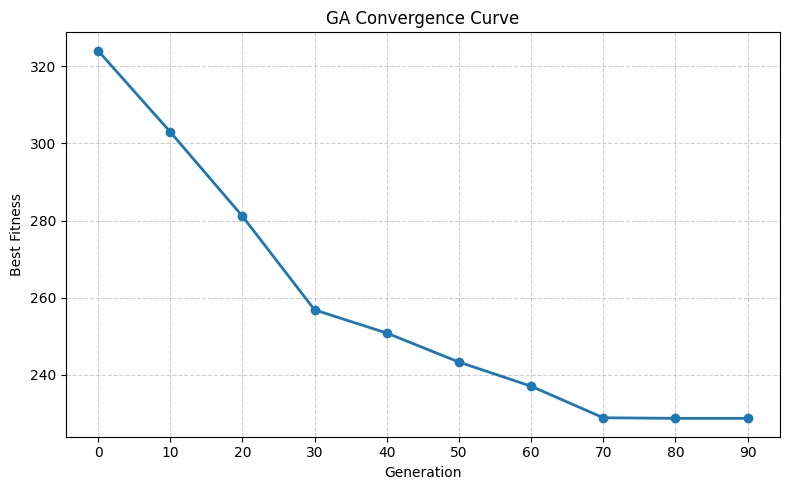

In [3]:
import matplotlib.pyplot as plt

# Data
generations = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
best_fitness = [324.07, 303.00, 281.13, 256.84, 250.83, 243.30, 237.04, 228.85, 228.70, 228.70]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(generations, best_fitness, marker='o', linestyle='-', linewidth=2)
plt.title('GA Convergence Curve')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xticks(generations)
plt.tight_layout()
plt.show()


### Rutas finales

<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:6: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
C:\Users\santi\AppData\Local\Temp\ipykernel_7256\1681886926.py:6: SyntaxWarning: invalid escape sequence '\c'
  clients_df = pd.read_csv('data_cases\caso_base\clients.csv')
C:\Users\santi\AppData\Local\Temp\ipykernel_7256\1681886926.py:7: SyntaxWarning: invalid escape sequence '\c'
  depots_df = pd.read_csv('data_cases\caso_base\depots.csv')


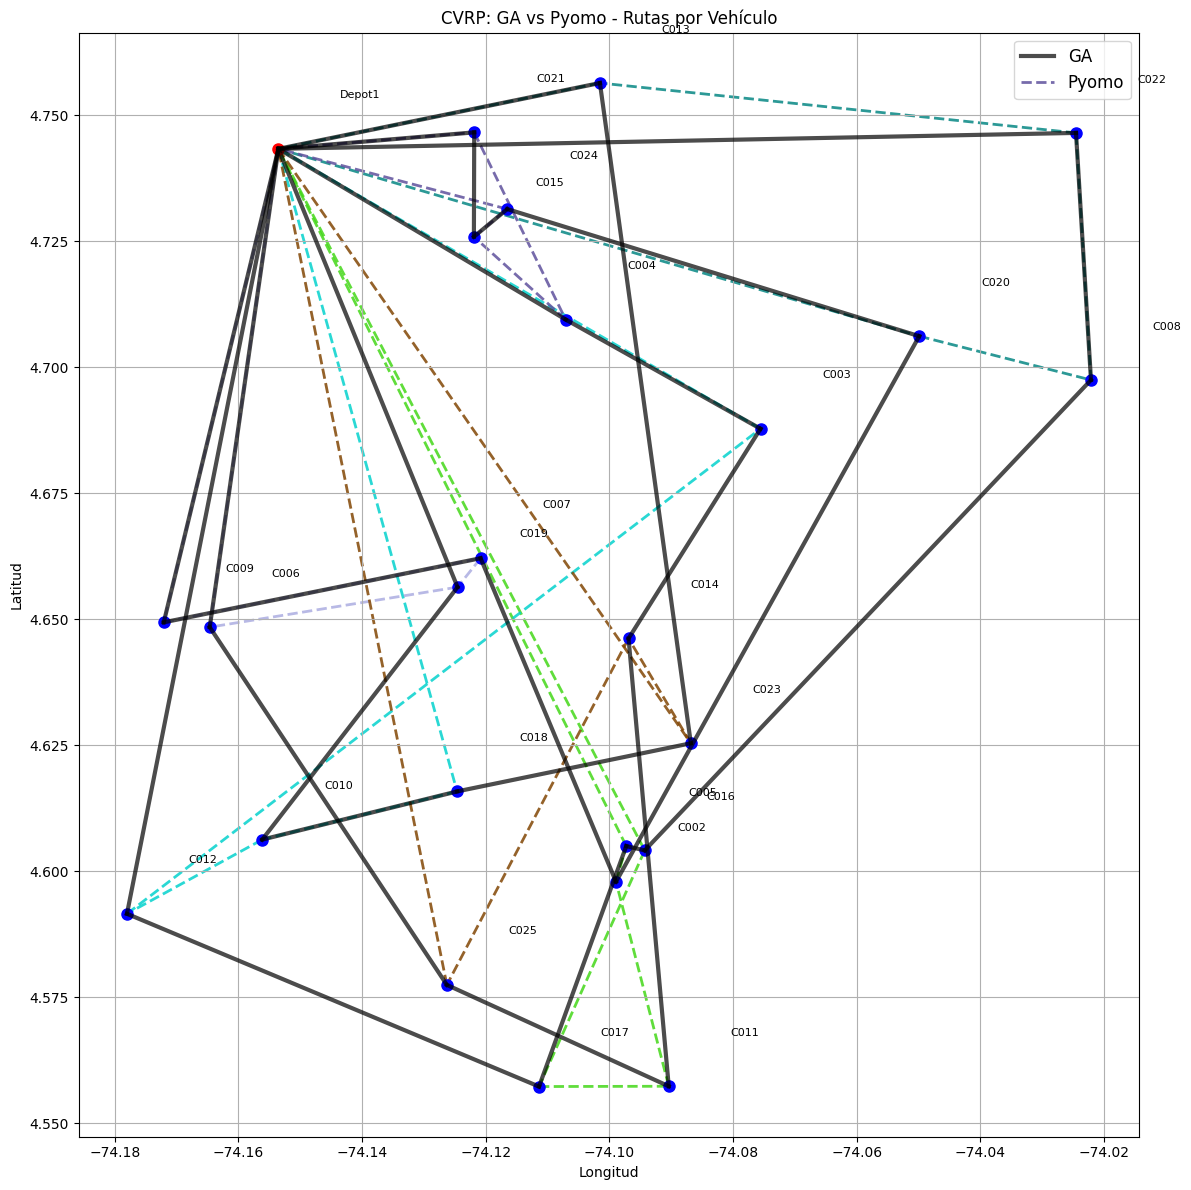

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Cargar datos de clientes y depósitos
clients_df = pd.read_csv('data_cases\caso_base\clients.csv')
depots_df = pd.read_csv('data_cases\caso_base\depots.csv')

# Construir diccionario de coordenadas (LocationID -> (lon, lat))
coords_df = pd.concat([
    clients_df[['LocationID', 'Longitude', 'Latitude']],
    depots_df[['LocationID', 'Longitude', 'Latitude']]
], ignore_index=True).drop_duplicates(subset='LocationID').set_index('LocationID')

# Mapear nombres de nodos
nombre_nodo = {row['LocationID']: f"C{int(row['LocationID']):03}" for _, row in clients_df.iterrows()}
for _, row in depots_df.iterrows():
    nombre_nodo[row['LocationID']] = f"Depot{int(row['DepotID'])}"


# 1. GA ROUTES (Depot is node 1)
ga_routes = {
    'V1': [1, 21, 15, 24, 20, 2, 7, 9, 1],
    'V4': [1, 13, 23, 18, 10, 19, 1],
    'V7': [1, 4, 3, 14, 11, 25, 6, 1],
    'V8': [1, 12, 17, 5, 16, 8, 22, 1]
}

# 2. PYOMO ROUTES (from 'RouteSequence' in vehicle_routes_results.csv)
pyomo_routes_df = pd.read_csv('vehicle_routes_results.csv')
pyomo_routes = {}
for idx, row in pyomo_routes_df.iterrows():
    veh = f"PyomoV{row['VehicleId']}"
    route = [int(x) for x in row['RouteSequence'].split('-')]
    pyomo_routes[veh] = route

# --- PLOT BOTH SOLUTIONS ---

plt.figure(figsize=(12, 12))
plt.title("CVRP: GA vs Pyomo - Rutas por Vehículo")

# Plot nodos (depots in red, clients in blue)
for loc_id, (lon, lat) in coords_df.iterrows():
    es_deposito = loc_id in depots_df['LocationID'].values
    plt.plot(lon, lat, 'ro' if es_deposito else 'bo', markersize=8)
    plt.text(lon + 0.01, lat + 0.01, nombre_nodo[loc_id], fontsize=8)

# Plot GA routes
for v, route in ga_routes.items():
    color = 'black'  # Use black for all GA for clear contrast
    for i in range(len(route) - 1):
        x1, y1 = coords_df.loc[route[i]]
        x2, y2 = coords_df.loc[route[i + 1]]
        plt.plot([x1, x2], [y1, y2], color=color, linewidth=3, alpha=0.7, zorder=2, label="GA" if i == 0 and v == 'V1' else "")

# Plot Pyomo routes (color per vehicle)
for v, route in pyomo_routes.items():
    color = "#" + ''.join(random.choices('0123456789ABCDEF', k=6))
    for i in range(len(route) - 1):
        x1, y1 = coords_df.loc[route[i]]
        x2, y2 = coords_df.loc[route[i + 1]]
        plt.plot([x1, x2], [y1, y2], color=color, linewidth=2, linestyle='--', alpha=0.85, zorder=1, label="Pyomo" if i == 0 else "")

# Build legend only once per label
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=12)

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()
